      *Building a Multiclass Classification Convolutional Neural Network Model*
       **Fashion-MNIST clothing Image Classification**

**Importing the Libraries**

In [29]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot


In [ ]:
import tensorflow as tf
from tensorflow import keras

**Load the fashion_mnist data**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["Tshirt/top", "Trouser", "Pullover","Dress","Coat","Sandal", "Shirt","Sneaker","Bag","Ankle boot"]

#plot first few images

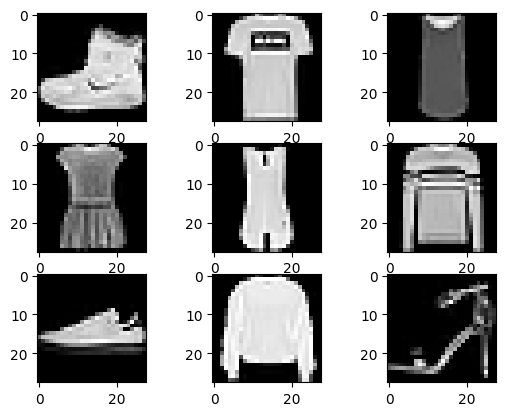

In [30]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train_full[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

**Data Reshape**

In [ ]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

**Data Normalization**

In [ ]:
X_train_norm = X_train_full/255.0
X_test_norm = X_test/255.0

 **Split the data into train/validation/test datasets**

In [ ]:
X_valid, X_train = X_train_norm[:5000], X_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_norm


**Create the model Architecture**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation ='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

**Summarize the model**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

**Compile the model**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

**Train the model**

In [ ]:
model_history = model.fit(X_train,y_train,epochs=70,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/70
860/860 [==============================] - 40s 46ms/step - loss: 0.4292 - accuracy: 0.8456 - val_loss: 0.5176 - val_accuracy: 0.8154
Epoch 2/70
860/860 [==============================] - 39s 45ms/step - loss: 0.4079 - accuracy: 0.8545 - val_loss: 0.3792 - val_accuracy: 0.8682
Epoch 3/70
860/860 [==============================] - 39s 45ms/step - loss: 0.3894 - accuracy: 0.8606 - val_loss: 0.3785 - val_accuracy: 0.8656
Epoch 4/70
860/860 [==============================] - 38s 44ms/step - loss: 0.3737 - accuracy: 0.8655 - val_loss: 0.3937 - val_accuracy: 0.8642
Epoch 5/70
860/860 [==============================] - 38s 44ms/step - loss: 0.3591 - accuracy: 0.8704 - val_loss: 0.4830 - val_accuracy: 0.8196
Epoch 6/70
860/860 [==============================] - 40s 46ms/step - loss: 0.3472 - accuracy: 0.8739 - val_loss: 0.3848 - val_accuracy: 0.8558
Epoch 7/70
860/860 [==============================] - 40s 47ms/step - loss: 0.3378 - accuracy: 0.8787 - val_loss: 0.3308 - val_accuracy:

**Evaluate a trained neural network**

In [ ]:
score=model.evaluate(X_test_norm,y_test)
print('Test Score',score[0])
print('Test Accuracy',score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.2779 - accuracy: 0.9131
Test Score 0.27788764238357544
Test Accuracy 0.913100004196167


**Plot training accuracy  and loss and validation accuracy and loss

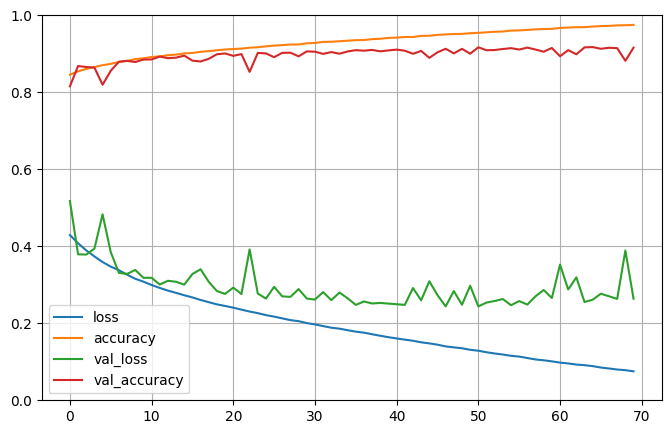

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


**Inference or Predictions using a trained convolutional neural network**

In [24]:
y_test[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [25]:
y_pred = model.predict(X_test)
y_pred[:10]

313/313 [==============================] - 4s 13ms/step


array([[1.65973131e-06, 2.73261875e-08, 3.68359366e-07, 2.53792987e-08,
        1.26557795e-08, 5.85241469e-06, 6.94542805e-08, 1.52521374e-04,
        1.28403226e-05, 9.99826670e-01],
       [3.62675593e-07, 2.23733944e-14, 9.99996722e-01, 7.43976929e-12,
        2.32731327e-06, 4.89905900e-15, 4.29733149e-07, 1.37329783e-16,
        5.28699162e-15, 7.66174759e-15],
       [2.41885696e-11, 9.99999940e-01, 7.52365878e-12, 2.93062852e-10,
        5.25730970e-09, 7.29980258e-13, 5.90937629e-12, 4.32993431e-13,
        1.00063859e-12, 8.82023675e-13],
       [2.71698831e-12, 9.99999344e-01, 2.91949451e-11, 5.65164441e-07,
        7.50799778e-09, 8.17666941e-12, 7.74020570e-11, 7.99636832e-13,
        1.91362375e-13, 2.12846910e-11],
       [7.75727443e-04, 2.31928338e-10, 5.07157210e-06, 1.15141972e-07,
        3.35966206e-07, 1.27204594e-10, 9.99218762e-01, 4.14456316e-11,
        1.98192351e-10, 4.47753952e-11],
       [2.91511970e-09, 9.99999702e-01, 5.02506037e-10, 1.27007027e-08,
   

In [27]:
y_pred = np.array([np.argmax(pred) for pred in y_pred])
y_pred[:10],y_test[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))